<a href="https://colab.research.google.com/github/Abhiieee009/ML-PROJECTS/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and preprocessing

In [22]:
#loading  csv data  to a pandas dataframe
gold_data = pd.read_csv('//content/gold_price_data.csv')

In [23]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [24]:
#print tht last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


Data collection and analysis


In [25]:
#number of rows and cols
gold_data.shape

(2290, 6)

In [26]:
#getting some basic info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [27]:
#checking the missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [29]:
#getting the statistical data of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correaltion:
+ve corr
-ve corr


In [32]:
correlation = gold_data.drop('Date',axis=1).corr()

<Axes: >

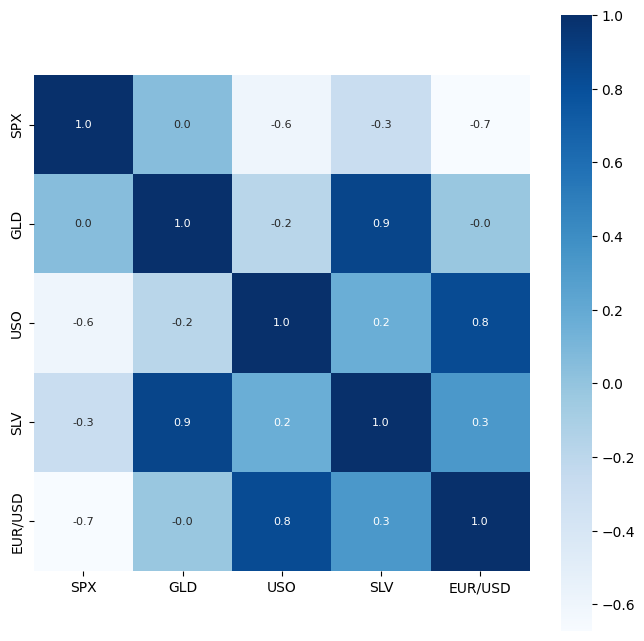

In [33]:
#constructing the heatmap to understand the corr
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [34]:
#corr value of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-35-4138563249.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

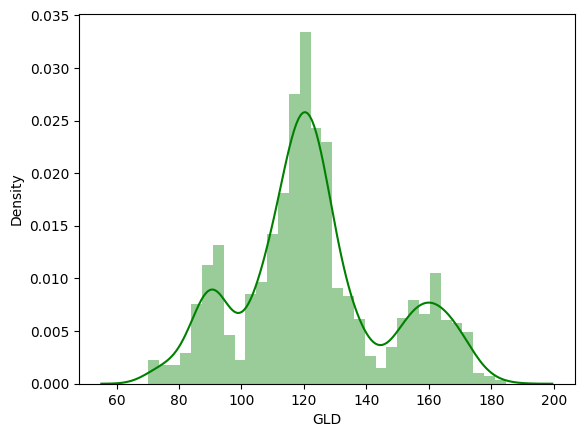

In [35]:
#checking the distibution of gold price
sns.distplot(gold_data['GLD'],color='green')

In [36]:
#splitting the features and target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [37]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [38]:
#splitting into training data and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training : Random Forest Regressor


In [39]:
regressor = RandomForestRegressor(n_estimators=100)

In [40]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evalution

In [41]:
#prediction on Test data
test_data_prediction = regressor.predict(X_test)

In [42]:
  print(test_data_prediction)

[168.39099978  82.03690012 115.93049986 127.70040124 120.61150149
 154.56289807 150.46489819 126.06830038 117.42519873 125.90940086
 116.76730057 171.74210081 141.58089889 167.91249717 115.13610017
 117.70800029 138.56560365 170.38890142 160.01150362 160.89669941
 155.12550027 125.34440055 176.11469951 156.84540329 125.2112006
  93.76749989  77.54529988 120.74650008 119.05959895 167.39219984
  88.10610065 125.42820052  91.22990083 117.81309998 121.03879935
 136.65680122 115.57740108 115.36710064 147.92119963 107.28740125
 104.68570239  87.21529812 126.54600035 117.81569997 152.58609898
 119.54410021 108.25580025 108.01399834  93.18110047 127.10239779
  75.25950025 113.71149944 121.14580022 111.14359959 118.77639894
 120.29939916 159.90159937 167.16380128 146.93799729  86.01959882
  94.39070041  86.91139901  90.41170014 119.01280056 126.47640055
 127.55350032 171.35460063 122.26949958 117.40609899  98.8169004
 168.13950137 142.99829854 132.39930295 121.18240202 121.28679942
 119.7968003

In [44]:
#R square error:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square error : ",error_score)

R square error :  0.9890485575353175


compare the actual values and predicited values in plot

In [45]:
Y_test = list(Y_test)

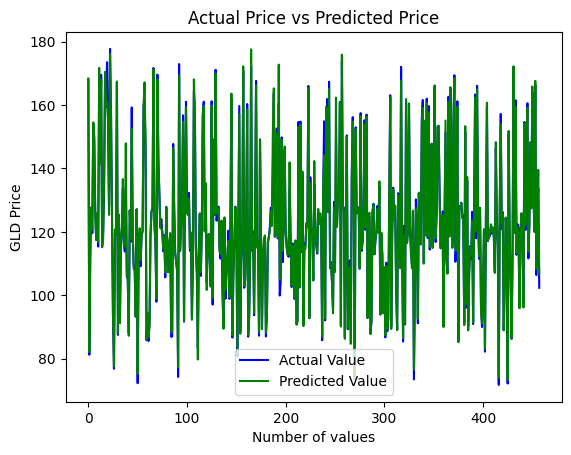

In [46]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()